In [1]:
# Baseline MLP for MNIST dataset
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

import keras
from keras.utils import np_utils

from vis.vis_utils2 import plot_model2, model_to_dot2
from utils.keras_helper import plot_history, create_exploded_mnist, show_random_mnist

%load_ext autoreload
%autoreload 2

c:\users\peter\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Intro to Neural Network Architectures

PyData Meetup  3.5.2018
Peter Neeb

![Hans_Moravec](img/zoom_out_ai.png)

![Hans_Moravec](img/deep_networks.png)

## Intro to Neural Network Architectures

### Agenda
* #### Dense Layer (Fully Connected)
* #### Convolutional Layer
* #### Recurrent Layer


## The MNIST dataset

* 60000 Training images with hand written images in gray scale 
* 10000 Test images

* image size = 28*28 = 784 pixel


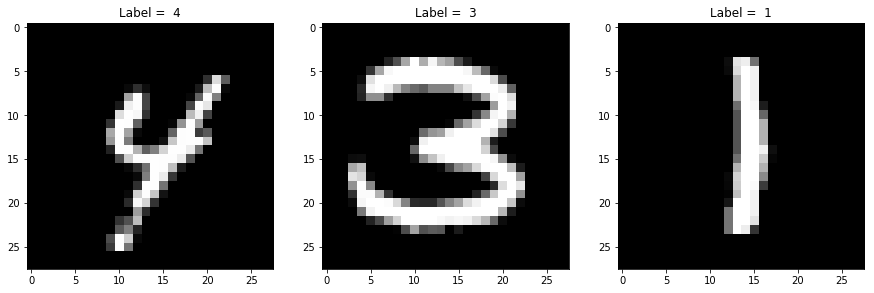

In [2]:
#Load the MNIST Dataset
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()

show_random_mnist(train_data, train_label)

## Standard machine learning procedure for supervised learning
#### Model 
$ predicted\_value = function(input\_data,trainable\_weights) $
#### Loss function
$ loss = function(true\_value,predicted\_value) $
#### Gradient descent
 $ \frac{\partial loss}{\partial weights} $ 
#### Update weights
$ weight\_update = -learning\_rate*\frac{\partial loss}{\partial weights} $


## The Model:
![foo.svg](img/dense_overview.png)


## Why activation functions?
<img style="float: right;" src="img/sigmoid_activation.png">
#### * normalisation of input for next layer
#### * adding non linearity to the output of layer



## About activation functions
<img style="float: right;" src="img/activation.png">
Common Activations funtions:
####  sigmoid:  $ y = \frac{1}{1+e^{-x}}$
#### tanh:  $ y = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$
#### relu:  $ y = max(0,x)$
#### softmax:  $ y_i = \frac{e^{x_i}}{\sum_i e^{x_i}} $




## Categorical Model
For predicting the correct digit a scalar as label is not suited.  It implies for a correct value of e.g "1" a prediction of "2" is less wrong than predicting a "9"

#### One hot encoding
Labels (scalar) with 10 possible values are converted to a vector of size 10
>8 => [0,0,0,0,0,0,0,1,0]
>
>1 => [0,1,0,0,0,0,0,0,0]

#### Using softmax as final activation function
* Adds nonlinearity (exp(x)) 
* Normalizes the output to a range 0-1, adding up to 1 for all classes
* Result of softmax can be taken as possibility distribution

Softmax :  $ y_i = \frac{\exp(z_i)}{\sum_i \exp(z_i)} $  




In [80]:
#(re)Load the MNIST Dataset
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
train_data = train_data.reshape(train_data.shape[0], -1).astype('float32')
test_data = test_data.reshape(test_data.shape[0], -1).astype('float32')
# normalize inputs from 0-255 to 0-1
train_data = train_data / 255
test_data = test_data / 255
# one hot encode outputs
train_label= np_utils.to_categorical(train_label)
test_label= np_utils.to_categorical(test_label)


## Short Recap
<img style="float: right;" src="img/dense_overview_small.png">

#### * we defined a network architecture
#### * we defined activation functions to add non-linearity
#### * we will get a probability distribution as output
#### * we prepared the data

![foo.svg](img/categorical_crossentropy.png)


In [4]:
def softmax(logits):
    return np.exp(logits) / np.sum(np.exp(logits))

def CrossEntropy(yHat, y):
    if yHat == 1:
      return -np.log(y)
    else:
      return -np.log(1 - y)
def print_table():
    print("neuron\t\traw output\tsoftmax\t\ttrue label\tcross entropy")
    for i in range(10):
        print("{}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(i,output_before_softmax[i],output[i],true_label[i],loss[i]))
    print()
    print("sum\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(np.sum(output_before_softmax),np.sum(output),np.sum(true_label),np.sum(loss)))

In [35]:
output_before_softmax = [-3.2, 0.003, 0.13, 2.9, 1.1, 0.21, -5.4, -1.2, 0.2, 0.1]
output = softmax(output_before_softmax)
true_label = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
loss = [CrossEntropy(true_label[i],output[i]) for i in range(10)]
print_table()


neuron		raw output	softmax		true label	cross entropy
0		-3.20		0.00		0.00		0.00
1		0.00		0.04		0.00		0.04
2		0.13		0.04		0.00		0.04
3		2.90		0.67		1.00		0.40
4		1.10		0.11		0.00		0.12
5		0.21		0.05		0.00		0.05
6		-5.40		0.00		0.00		0.00
7		-1.20		0.01		0.00		0.01
8		0.20		0.04		0.00		0.05
9		0.10		0.04		0.00		0.04

sum		-5.16		1.00		1.00		0.75


![foo.svg](img/gradient_overview.png?1)







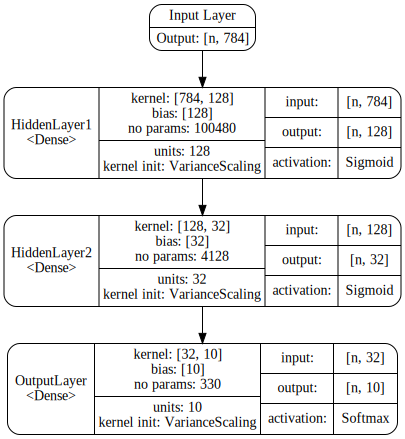

In [81]:
# Putting in all together
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

def create_dense_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='sigmoid', name="HiddenLayer1"),
        Dense(32, activation='sigmoid', name="HiddenLayer2"),
        Dense(10, activation='softmax', name="OutputLayer"),
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_dense_model(28*28)
SVG(model_to_dot2(model,rankdir='TB').create(prog='dot', format='svg'))

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 1.1324 - acc: 0.7625     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.4114 - acc: 0.9060     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.2814 - acc: 0.9265     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.2234 - acc: 0.9391     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1851 - acc: 0.9490     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.1572 - acc: 0.9564     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.1353 - acc: 0.9626     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.1176 - acc: 0.9679     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.1031 - acc: 0.9721     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0912 - acc: 0.9751     
Error on test data: 3.18%
Error on training data:

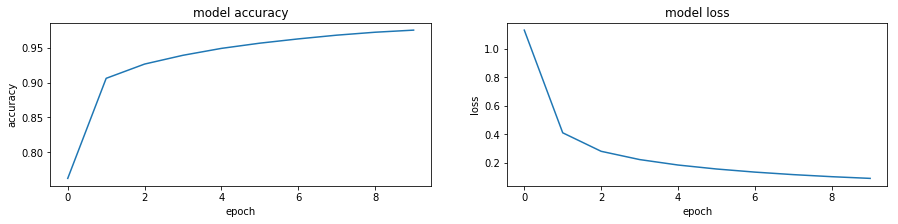

In [82]:
history = model.fit(train_data, train_label, epochs=10, batch_size=200, verbose=1)

# Final evaluation of the model
_, test_scores  = model.evaluate(test_data,  test_label,  verbose=0)
_, train_scores = model.evaluate(train_data, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)


In [8]:
def createShuffledData(train, test):
    l = train.shape[1]
    idx = np.random.permutation(range(l))
    for i in range(train.shape[0]):
        train[i] = train[i][idx]
    for i in range(test.shape[0]):
        test[i] = test[i][idx]
    return train, test

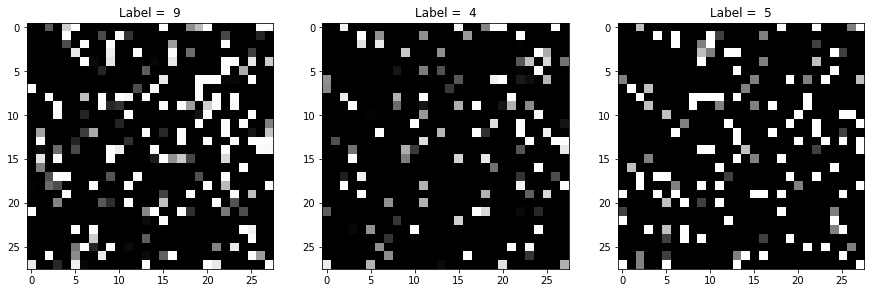

In [9]:
#
# Shuffeling the input data
#
train_shuffled, test_shuffled = createShuffledData(train_data, test_data)
show_random_mnist(train_shuffled.reshape(-1,28,28), train_label)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 1.1223 - acc: 0.7638     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.3998 - acc: 0.9063     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.2721 - acc: 0.9284     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.2143 - acc: 0.9421     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1782 - acc: 0.9511     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.1519 - acc: 0.9571     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.1317 - acc: 0.9631     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.1150 - acc: 0.9677     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.1012 - acc: 0.9716     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0893 - acc: 0.9755     
Error on test data: 3.27%
Error on training data:

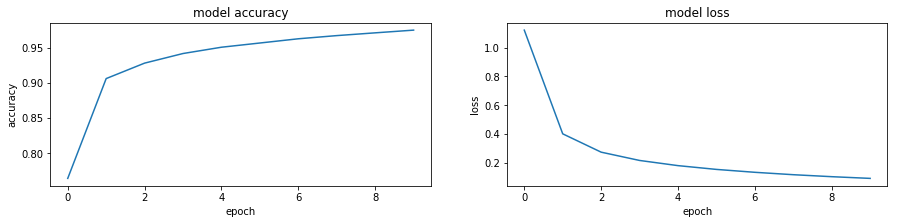

In [10]:
model = create_dense_model(28*28)
history = model.fit(train_data, train_label, epochs=10, batch_size=200, verbose=1)

# Final evaluation of the model
_, test_scores  = model.evaluate(test_data,  test_label,  verbose=0)
_, train_scores = model.evaluate(train_data, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)

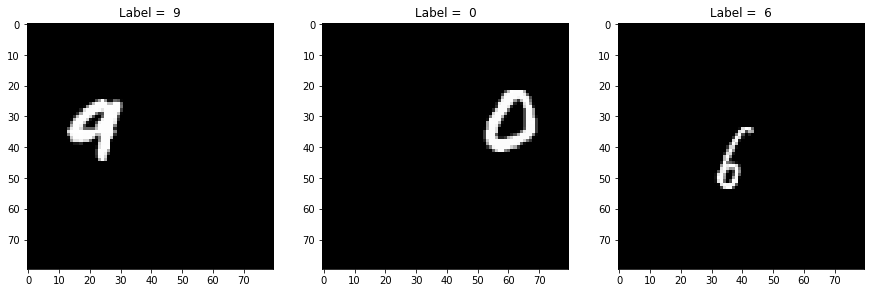

In [11]:
#
# increasing the image size to 80*80 pixels
# place mnist image at random location in 80*80 frame
#
train_exploded, train_label, test_exploded, test_label =  create_exploded_mnist(flatten=True)
show_random_mnist(train_exploded.reshape(-1,80,80), train_label)


Epoch 1/20
60000/60000 [==============================] - 10s - loss: 2.1798 - acc: 0.2078    
Epoch 2/20
60000/60000 [==============================] - 10s - loss: 2.0025 - acc: 0.2725    
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 1.8274 - acc: 0.3445     
Epoch 4/20
60000/60000 [==============================] - 9s - loss: 1.5982 - acc: 0.4426     
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 1.3623 - acc: 0.5429     
Epoch 6/20
60000/60000 [==============================] - 9s - loss: 1.1499 - acc: 0.6266     
Epoch 7/20
60000/60000 [==============================] - 9s - loss: 0.9721 - acc: 0.6902     
Epoch 8/20
60000/60000 [==============================] - 10s - loss: 0.8303 - acc: 0.7408    
Epoch 9/20
60000/60000 [==============================] - 10s - loss: 0.7128 - acc: 0.7824    
Epoch 10/20
60000/60000 [==============================] - 10s - loss: 0.6143 - acc: 0.8179    
Epoch 11/20
60000/60000 [========================

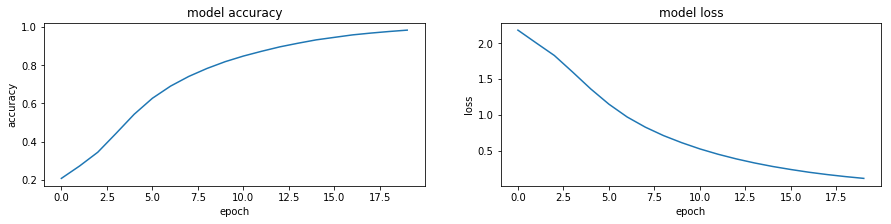

In [26]:
# create model
model = create_dense_model(80*80)
history = model.fit(train_exploded, train_label, epochs=20, batch_size=200, verbose=1)

# Final evaluation of the model
_, test_scores  = model.evaluate(test_exploded,  test_label,  verbose=0)
_, train_scores = model.evaluate(train_exploded, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)

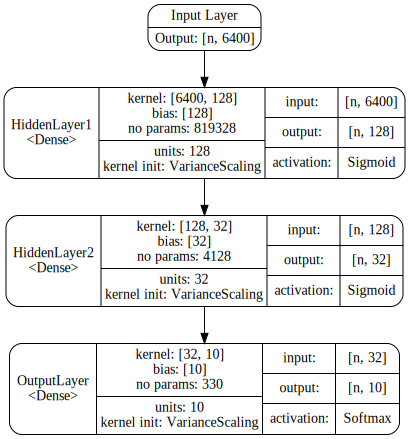

In [25]:
# Display Model
SVG(model_to_dot2(model,rankdir='TB').create(prog='dot', format='svg'))


## Summary Dense Models

* use input pixels as independent features
* do not use information about neighboring pixels
* tend to have a lot of parameters



Note:  no measures were taken to increase the ability to generalize (mimimize the difference between accuracy for test and training data) 

## Convolutional layers


![Convolutions](img/conv_overview.png)

## Usage of Convoluational networks 1
![image.png](img/ff1.png)

## Usage of Convoluational networks 2
![image.png](img/ff2.png?1)

![Convolutions](img/filter.png?1)

In [14]:
def showTajMahal():
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(image)
    ax.set_title('Original')
    ax2.imshow(processed_image)
    ax2.set_title("Filtered")
    plt.show()

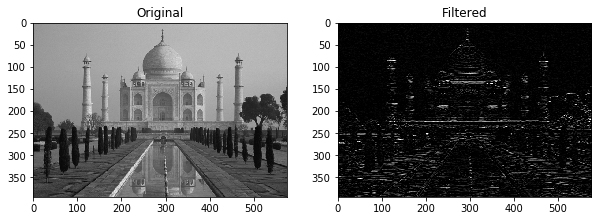

In [83]:
# use of hand crafted kernels (=filters work)
image = cv2.imread('img/tajmahal.png')
kernel_h = np.array( [[-1,-1,-1],
                    [ 2, 2, 2],
                    [-1,-1,-1]])
kernel_v = np.array( [[-1, 2,-1],
                    [-1, 2,-1],
                    [-1, 2,-1]])
processed_image = cv2.filter2D(image,-1,kernel_h)
showTajMahal()

## How does pooling filters work
![Convolutions](img/pooling.png)

In [16]:
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()
# normalize inputs from 0-255 to 0-1
train_data = train_data / 255
test_data = test_data / 255
# one hot encode outputs
train_label= np_utils.to_categorical(train_label)
test_label= np_utils.to_categorical(test_label)

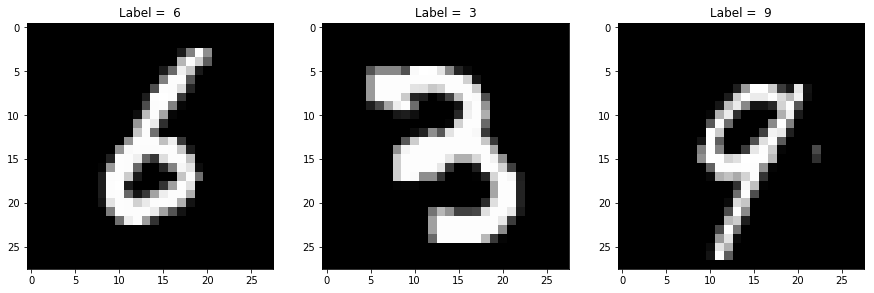

In [17]:
# The 'standard' MNIST dataset
# Results for dense network:  3.2% error on training data, 2.2% on test data
show_random_mnist(train_data, train_label)

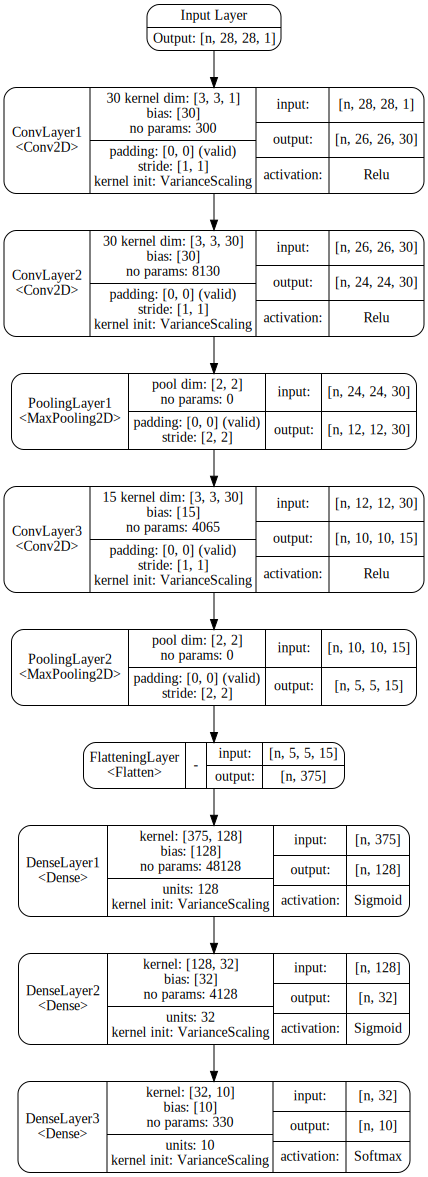

In [85]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1).astype('float32')
test_data =  test_data.reshape(test_data.shape[0], 28, 28, 1).astype('float32')

def createConvModel(input_dim):
    conv_model = Sequential([
        Conv2D(30, (3, 3), input_shape=input_dim, activation='relu', name = "ConvLayer1"),
        Conv2D(30, (3, 3), activation='relu', name = "ConvLayer2"),
        MaxPooling2D(pool_size=(2, 2), name = "PoolingLayer1"),
        Conv2D(15, (3, 3), activation='relu', name = "ConvLayer3"),
        MaxPooling2D(pool_size=(2, 2), name = "PoolingLayer2"),
        Flatten(name = "FlatteningLayer"),
        Dense(128, activation='sigmoid',name = "DenseLayer1"),
        Dense(32, activation='sigmoid',name = "DenseLayer2"),
        Dense(10, activation='softmax',name = "DenseLayer3")
    ])  
    conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return conv_model

conv_model = createConvModel((28,28, 1))
SVG(model_to_dot2(conv_model,rankdir='TB').create(prog='dot', format='svg'))

Epoch 1/10
60000/60000 [==============================] - 116s - loss: 0.8353 - acc: 0.8291   
Epoch 2/10
60000/60000 [==============================] - 124s - loss: 0.1632 - acc: 0.9698   
Epoch 3/10
60000/60000 [==============================] - 127s - loss: 0.0956 - acc: 0.9785   
Epoch 4/10
60000/60000 [==============================] - 123s - loss: 0.0684 - acc: 0.9836   
Epoch 5/10
60000/60000 [==============================] - 126s - loss: 0.0525 - acc: 0.9870   
Epoch 6/10
60000/60000 [==============================] - 129s - loss: 0.0433 - acc: 0.9896   
Epoch 7/10
60000/60000 [==============================] - 131s - loss: 0.0361 - acc: 0.9909   
Epoch 8/10
60000/60000 [==============================] - 134s - loss: 0.0303 - acc: 0.9923   
Epoch 9/10
60000/60000 [==============================] - 124s - loss: 0.0250 - acc: 0.9940   
Epoch 10/10
60000/60000 [==============================] - 120s - loss: 0.0215 - acc: 0.9946   
Error on test data: 1.06%
Error on training data:

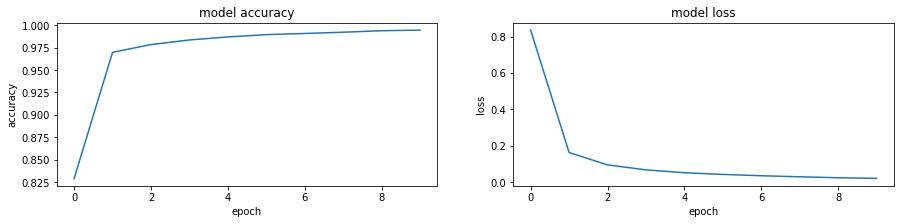

In [30]:
history = conv_model.fit(train_data, train_label, epochs=10, batch_size=200, verbose=1)

# Final evaluation of the model
_, test_scores  = conv_model.evaluate(test_data,  test_label,  verbose=0)
_, train_scores = conv_model.evaluate(train_data, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)

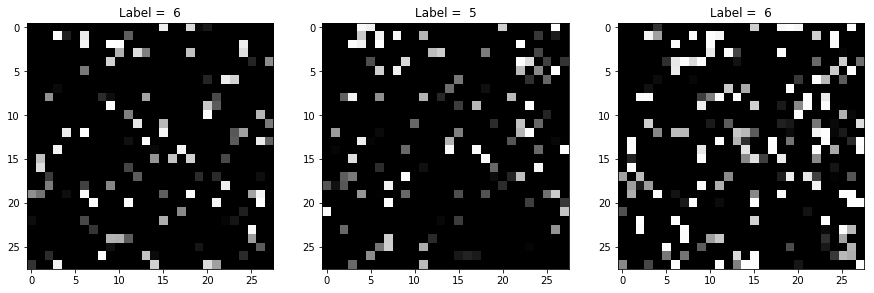

In [31]:
# Shuffled MNIST data
# Results for dense network:  3.2% error on training data, 2.2% on test data
#
show_random_mnist(train_shuffled.reshape(-1,28,28), train_label)

Epoch 1/10
60000/60000 [==============================] - 120s - loss: 1.3646 - acc: 0.6243   
Epoch 2/10
60000/60000 [==============================] - 119s - loss: 0.4579 - acc: 0.8861   
Epoch 3/10
60000/60000 [==============================] - 120s - loss: 0.2963 - acc: 0.9191   
Epoch 4/10
60000/60000 [==============================] - 119s - loss: 0.2252 - acc: 0.9371   
Epoch 5/10
60000/60000 [==============================] - 120s - loss: 0.1832 - acc: 0.9478   
Epoch 6/10
60000/60000 [==============================] - 119s - loss: 0.1557 - acc: 0.9556   
Epoch 7/10
60000/60000 [==============================] - 120s - loss: 0.1331 - acc: 0.9618   
Epoch 8/10
60000/60000 [==============================] - 120s - loss: 0.1142 - acc: 0.9682   
Epoch 9/10
60000/60000 [==============================] - 119s - loss: 0.1004 - acc: 0.9716   
Epoch 10/10
60000/60000 [==============================] - 120s - loss: 0.0886 - acc: 0.9744   
Error on test data: 4.37%
Error on training data:

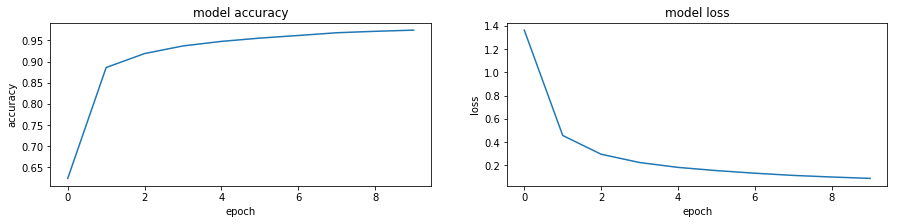

In [32]:
train_shuffled = train_shuffled.reshape(train_shuffled.shape[0], 28, 28, 1).astype('float32')
test_shuffled =  test_shuffled.reshape(test_shuffled.shape[0], 28, 28, 1).astype('float32')

conv_model = createConvModel((28,28, 1))
history = conv_model.fit(train_shuffled, train_label, epochs=10, batch_size=200, verbose=1)

# Final evaluation of the model
_, test_scores  = conv_model.evaluate(test_shuffled,  test_label,  verbose=0)
_, train_scores = conv_model.evaluate(train_shuffled, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)

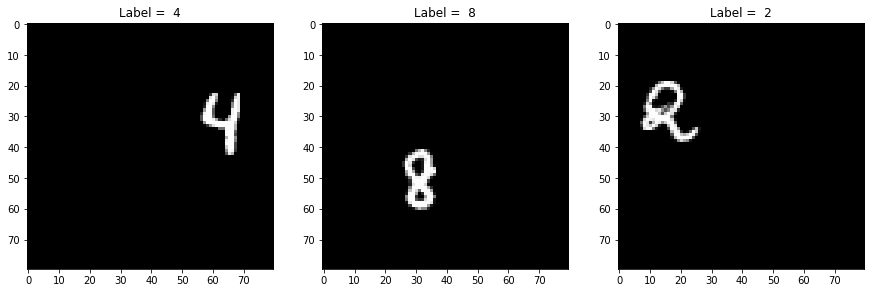

In [86]:
# Results for dense network:  25% error on test data, 1% on traing data
show_random_mnist(train_exploded.reshape(-1,80,80), train_label)

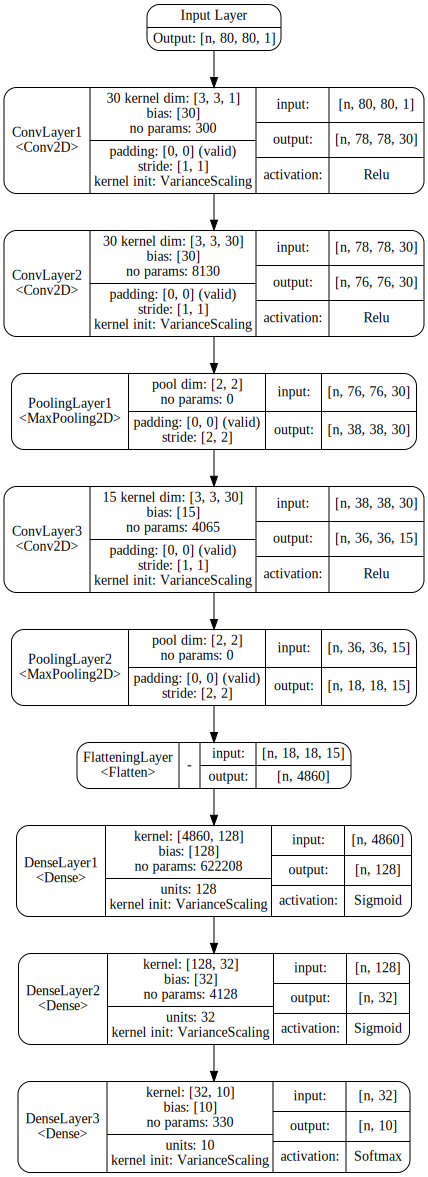

In [38]:
train_exploded = train_exploded.reshape(train_exploded.shape[0], 80, 80, 1).astype('float32')
test_exploded =  test_exploded.reshape(test_exploded.shape[0], 80, 80, 1).astype('float32')

conv_model = createConvModel((80,80, 1))
SVG(model_to_dot2(conv_model,rankdir='TB').create(prog='dot', format='svg'))

Epoch 1/10
60000/60000 [==============================] - 1122s - loss: 1.8059 - acc: 0.3452  
Epoch 2/10
60000/60000 [==============================] - 1125s - loss: 1.1069 - acc: 0.6581  
Epoch 3/10
60000/60000 [==============================] - 1119s - loss: 0.6579 - acc: 0.8359  
Epoch 4/10
60000/60000 [==============================] - 1111s - loss: 0.3958 - acc: 0.8992  
Epoch 5/10
60000/60000 [==============================] - 1111s - loss: 0.2707 - acc: 0.9306  
Epoch 6/10
60000/60000 [==============================] - 1108s - loss: 0.1965 - acc: 0.9518  
Epoch 7/10
60000/60000 [==============================] - 1109s - loss: 0.1414 - acc: 0.9656  
Epoch 8/10
60000/60000 [==============================] - 1118s - loss: 0.1041 - acc: 0.9766  
Epoch 9/10
60000/60000 [==============================] - 1108s - loss: 0.0719 - acc: 0.9856  
Epoch 10/10
60000/60000 [==============================] - 1115s - loss: 0.0515 - acc: 0.9912  
Error on test data: 6.64%
Error on train data: 0.

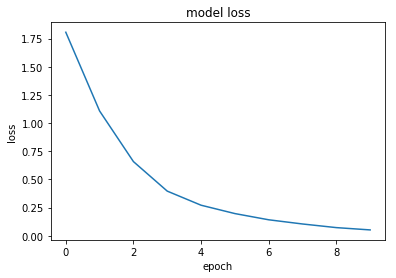

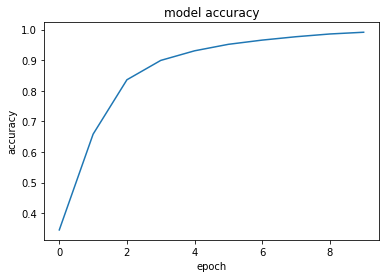

In [98]:
history = conv_model.fit(train_exploded, train_label, epochs=10, batch_size=200, verbose=1)

# Final evaluation of the model
_, test_scores  = conv_model.evaluate(test_exploded,  test_label,  verbose=0)
_, train_scores = conv_model.evaluate(train_exploded, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)

## Summary Convolutional Models
* often used as first layers followed by dense layers
* act as learnable feature extractors
* convolutional layers exists also for 1D and 3D
* much slower to train




## Recurrent Networks

![Convolutions](img/recurrent.png?1)

## Recurrent layer unfolding
### Recurrent cell 'unfolds' to sequence of cells 
### Internal state is passed thoughout sequence
![Convolutions](img/rnn-unrolled.png)


![Convolutions](img/gru_overview.png)

![Convolutions](img/mnist_sequence.png)

In [70]:
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()
# normalize inputs from 0-255 to 0-1
train_data = train_data / 255
test_data = test_data / 255
# one hot encode outputs
train_label= np_utils.to_categorical(train_label)
test_label= np_utils.to_categorical(test_label)

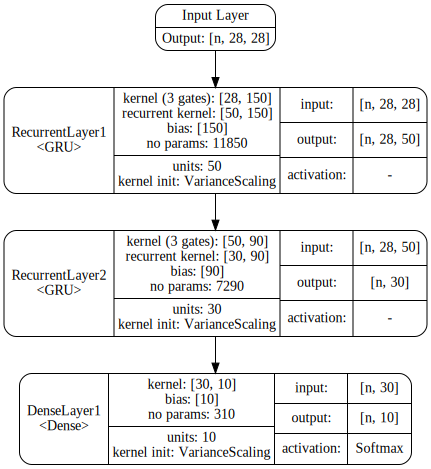

In [73]:
# Number of hidden units to use:
from keras.layers import SimpleRNN, Activation, GRU

rnn_model = Sequential([
    GRU(50,input_shape=(28, 28),return_sequences=True, activation = 'sigmoid', name='RecurrentLayer1'),
    GRU(30, activation = 'sigmoid', name='RecurrentLayer2'),
    Dense(units=10, activation ='softmax', name = 'DenseLayer1')])
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

SVG(model_to_dot2(rnn_model,rankdir='TB').create(prog='dot', format='svg'))

Epoch 1/10
60000/60000 [==============================] - 30s - loss: 2.2182 - acc: 0.2295    
Epoch 2/10
60000/60000 [==============================] - 29s - loss: 1.3050 - acc: 0.6214    
Epoch 3/10
60000/60000 [==============================] - 30s - loss: 0.6238 - acc: 0.8202    
Epoch 4/10
60000/60000 [==============================] - 31s - loss: 0.3836 - acc: 0.8942    
Epoch 5/10
60000/60000 [==============================] - 30s - loss: 0.2593 - acc: 0.9290    
Epoch 6/10
60000/60000 [==============================] - 30s - loss: 0.2010 - acc: 0.9436    
Epoch 7/10
60000/60000 [==============================] - 30s - loss: 0.1705 - acc: 0.9519    
Epoch 8/10
60000/60000 [==============================] - 30s - loss: 0.1496 - acc: 0.9574    
Epoch 9/10
60000/60000 [==============================] - 30s - loss: 0.1363 - acc: 0.9612    
Epoch 10/10
60000/60000 [==============================] - 30s - loss: 0.1254 - acc: 0.9643    
Error on test data: 3.20%
Error on training data:

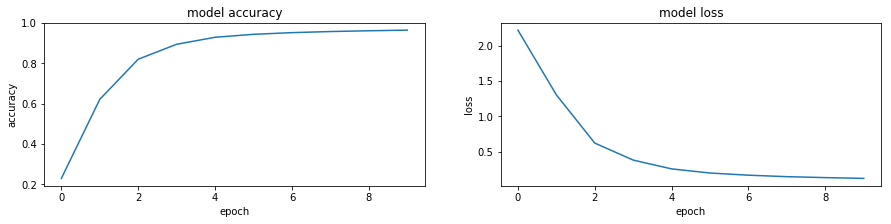

In [74]:
train_data = train_data.reshape(-1,28,28)
test_data = test_data.reshape(-1,28,28)

history = rnn_model.fit(train_data, train_label, epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
_, test_scores  = rnn_model.evaluate(test_data,  test_label,  verbose=0)
_, train_scores = rnn_model.evaluate(train_data, train_label, verbose=0)
print("Error on test data: {:.2%}".format(1 - test_scores))
print("Error on training data: {:.2%}".format(1 - train_scores))
plot_history(history)

## Summary Recurrent models
* RNNs form the base for data where order is relevant
* Probably the most complex layer 
* Can be combined with convolutional layers

## Take Home Message

### * Dense layers use existing input (or features)
### * Convolutional layers add spatial context
### * Recurrent layers add temporal context

![Convolutions](img/questions.png?1)